In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [13]:
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep = ',', index_col = 0)

In [14]:
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')
ExN_embeddings = ExN.merge(embeddings, on='gene_id', how='inner')

R2:  -0.8620857737624841
RMSE: 0.07345672206000257


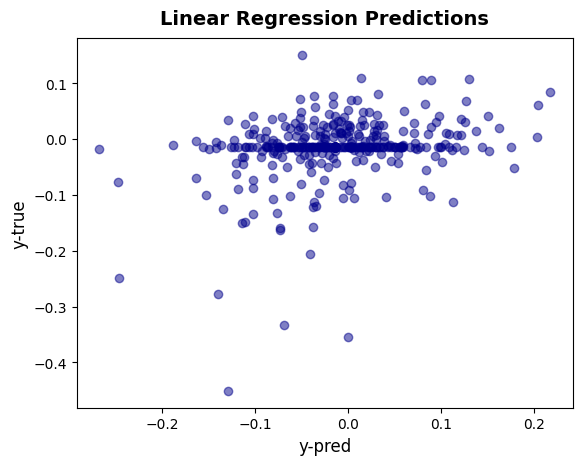

In [15]:
random.seed(38)

target_column = random.choice(ExN.columns)  # Randomly pick a column name

X = ExN_embeddings.drop(columns=[target_column])  # Features (all columns except the target)
y = ExN_embeddings[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9999942527659175


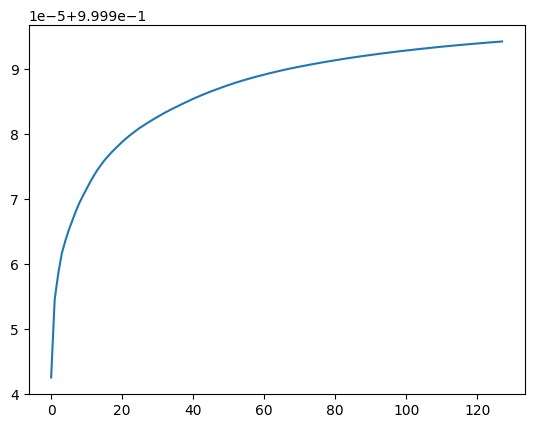

In [16]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [17]:
dims = 128
ExN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExN_PCA

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-781.412799,3.244696,-1.033162,4.215934,-3.376487,-0.533116,-2.661206,-5.841448,1.038684,-1.480087,...,0.189930,-0.753538,0.248559,-0.748045,-0.870562,0.440734,0.672224,0.471705,-0.409754,0.279881
1,3290.588818,2.428476,5.854907,3.347024,-2.157264,3.053500,-0.993019,2.897690,2.174281,0.451603,...,0.318852,-0.198924,0.089144,0.699725,0.430516,0.463297,0.516170,-0.764449,-0.626476,1.001820
2,-3018.412744,-8.608121,1.392654,-3.883831,-2.088364,-3.129721,0.196333,4.921546,-0.534988,-0.530448,...,-0.484193,-0.157066,-0.087788,-0.450755,-0.742056,-0.520094,0.682494,-1.097896,0.217761,-0.096746
3,2349.588538,6.102628,7.510622,1.865423,-0.357570,1.434699,1.708515,0.671664,-0.554004,-0.901681,...,0.263201,-0.288323,-0.148298,0.545599,0.094587,-0.000251,-0.252500,0.313922,-0.043178,0.418073
4,1239.586458,-11.828228,-0.149128,-7.262224,-0.558553,2.376864,2.180967,1.583179,2.550781,-1.782119,...,-0.213821,-0.548827,-0.835644,0.374146,0.391213,-1.340749,0.201993,-0.025847,1.247640,0.279218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,665.587192,-6.902997,-1.062363,-0.019379,0.068373,-0.992616,-0.227169,1.146673,-4.245049,0.681616,...,0.073711,0.666737,-0.487693,-0.713680,-0.321257,0.319716,-0.273098,-0.188475,0.225942,0.714755
2050,-661.413422,5.536735,-6.619623,3.632964,0.319312,1.613525,1.397188,-1.456012,3.082880,4.030250,...,0.907108,-0.265248,-0.236327,-0.289431,-0.875172,-0.460931,-0.184658,-0.447496,-0.121602,-0.065504
2051,1248.586956,-4.587744,1.511029,3.622151,0.333052,-1.012252,2.337301,-0.362824,0.100174,-4.882700,...,0.151526,0.572934,-0.367992,0.240043,0.108227,0.228483,0.639528,0.194837,-0.141899,-0.301785
2052,-451.412642,-3.923214,-0.460125,0.638666,-0.111944,5.547278,-3.837017,1.917156,0.873958,2.294601,...,-0.477436,0.820547,-0.136205,0.166751,-0.260614,-0.497860,0.251114,-0.420131,0.052000,-0.803020


R2:  0.03553915906217486
RMSE: 0.05286570192458858


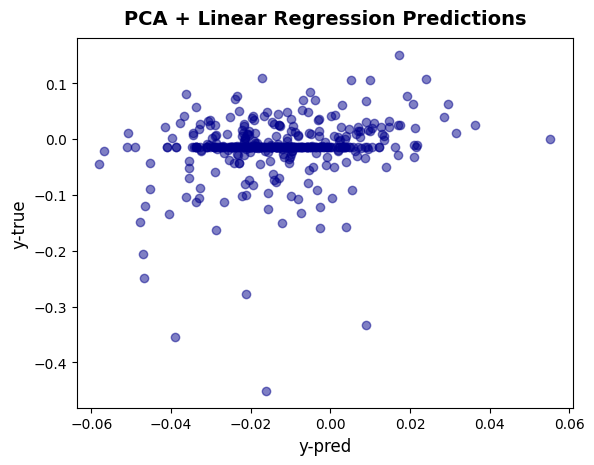

In [18]:
X_train, X_test, y_train, y_test = train_test_split(ExN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

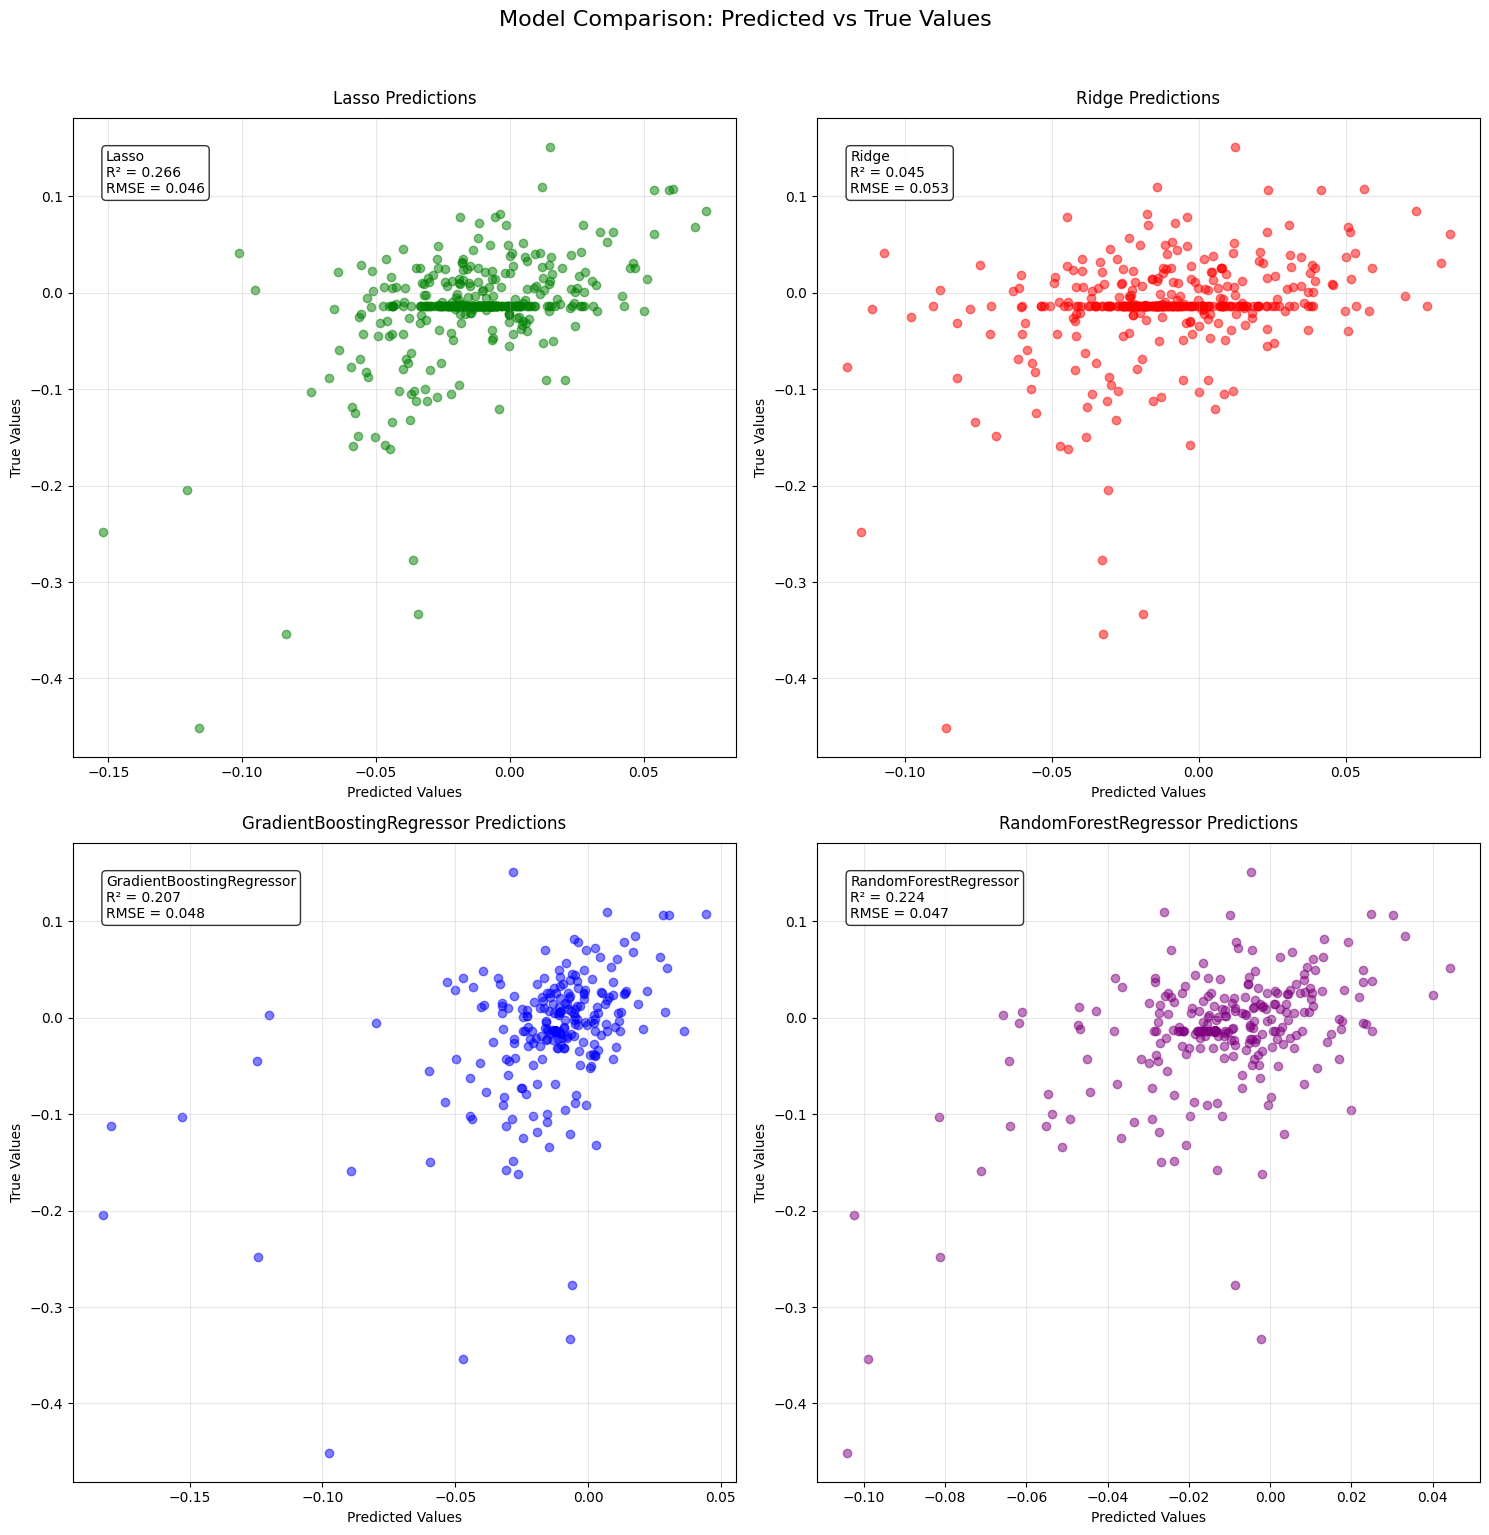

In [19]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.1323 - mse: 20.1323 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - mse

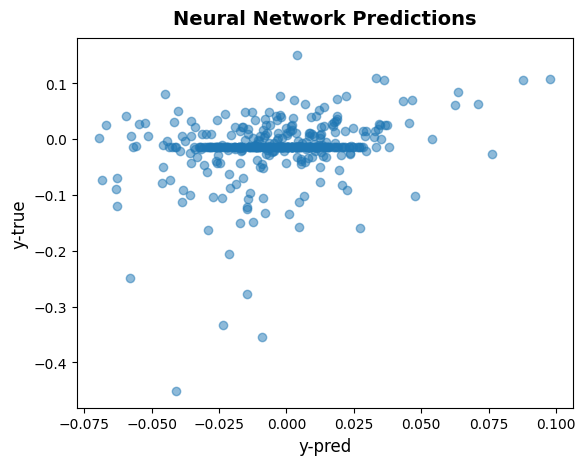

In [26]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()